In [1]:
import os
from PIL import Image
import numpy as np

image_dir = "/kaggle/input/final-dataset/preprocessed"

images = []
labels = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.webp') or filename.endswith('.jpeg'):
        # Full path to the image file
        image_path = os.path.join(image_dir, filename)
        
        # Load the image
        image = Image.open(image_path)
        # Resize the image to (224, 224)
        image = image.resize((224, 224))
        # Convert the image to a numpy array and normalize to [0, 1]
        image_array = np.array(image) / 255.0
        
        # Append the image to the images list
        images.append(image_array)
        
        # Assuming labels are encoded in the filename (e.g., 'real_001.jpg', 'fake_001.jpg')
        if 'real' in filename.lower():
            labels.append(0)  # Real label
        elif 'fake' in filename.lower():
            labels.append(1)  # Fake label

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print summary information
print(f"Total loaded images: {len(images)}")
print(f"Label distribution: Real - {np.sum(labels == 0)}, Fake - {np.sum(labels == 1)}")


Total loaded images: 1000
Label distribution: Real - 436, Fake - 564


In [2]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
Note: you may need to restart the kernel to use updated packages.


# EfficientNet-B7

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras import layers, models
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define the base model (EfficientNetB7)
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification (real or fake)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=16)


# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Optionally, save the model
model.save("efficientnetb7_deepfake_detector.h5")

2024-06-21 02:09:29.375542: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 02:09:29.375700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 02:09:29.507396: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


258076736/258076736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 7, 7, 2560)        64097687  
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 2560)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               327808    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                       

2024-06-21 02:11:20.744268: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb7/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1718935892.757159     108 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 [==============================] - 182s 795ms/step - loss: 0.5751 - accuracy: 0.7422 - val_loss: 1.9390 - val_accuracy: 0.4500
Epoch 2/10
40/40 [==============================] - 24s 597ms/step - loss: 0.4804 - accuracy: 0.8156 - val_loss: 3.5037 - val_accuracy: 0.4500
Epoch 3/10
40/40 [==============================] - 24s 598ms/step - loss: 0.3592 - accuracy: 0.8578 - val_loss: 1.1083 - val_accuracy: 0.4500
Epoch 4/10
40/40 [==============================] - 24s 598ms/step - loss: 0.2178 - accuracy: 0.9156 - val_loss: 1.3338 - val_accuracy: 0.4500
Epoch 5/10
40/40 [==============================] - 24s 602ms/step - loss: 0.1789 - accuracy: 0.9328 - val_loss: 0.7107 - val_accuracy: 0.4688
Epoch 6/10
40/40 [==============================] - 24s 601ms/step - loss: 0.2262 - accuracy: 0.9187 - val_loss: 1.5157 - val_accuracy: 0.4500
Epoch 7/10
40/40 [==============================] - 24s 598ms/step - loss: 0.1559 - accuracy: 0.9391 - val_loss: 0.9090 - val_accuracy: 0.5500
Epoch 8/1

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 7s 194ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.86      0.69        83
           1       0.85      0.56      0.68       117

    accuracy                           0.69       200
   macro avg       0.71      0.71      0.68       200
weighted avg       0.74      0.69      0.68       200

Sensitivity: 0.5641025641025641
Specificity: 0.8554216867469879


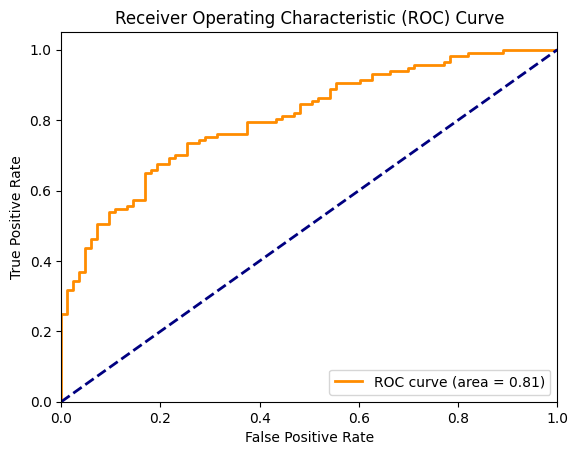

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Step 1: Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.round(predictions).astype(int).flatten() # Convert probabilities to binary labels

# Step 2: Generate the classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

# Step 3: Calculate sensitivity and specificity
conf_matrix = confusion_matrix(test_labels, predicted_labels)
tn, fp, fn, tp = conf_matrix.ravel()

sensitivity = tp / (tp + fn) # Sensitivity (also known as Recall or True Positive Rate)
specificity = tn / (tn + fp) # Specificity (also known as True Negative Rate)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

# Step 4: Plot ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Vit (Vision Transformer)

# Vit 

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input

from vit_keras import vit

# Preprocess images for ViT
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images = preprocess_input(train_images)
test_images = preprocess_input(test_images)

# Define ViT model
input_shape = (224, 224, 3)
num_classes = 1  # Binary classification (real or fake)

# Load ViT model
vit_model = vit.vit_b32(
    image_size=224,
    activation='sigmoid',
    pretrained=True,
    include_top=False,
    pretrained_top=False,
)

# Add layers on top of ViT
inputs = Input(shape=input_shape)
vit_output = vit_model(inputs)
flatten = Flatten()(vit_output)
dense = Dense(128, activation='relu')(flatten)
dropout = layers.Dropout(0.5)(dense)
outputs = Dense(num_classes, activation='sigmoid')(dropout)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=16)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Optionally, save the model
model.save("vit_deepfake_detector.h5")


/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


353253686/353253686 [==============================] - 2s 0us/step


/opt/conda/lib/python3.10/site-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 7, 7
  warnings.warn(


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vit-b32 (Functional)        (None, 768)               87455232  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               98432     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 87553793 (333.99 MB)
Trainable params: 87553793

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 4s 77ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.58      1.00      0.74       117

    accuracy                           0.58       200
   macro avg       0.29      0.50      0.37       200
weighted avg       0.34      0.58      0.43       200

Sensitivity: 1.0
Specificity: 0.0


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


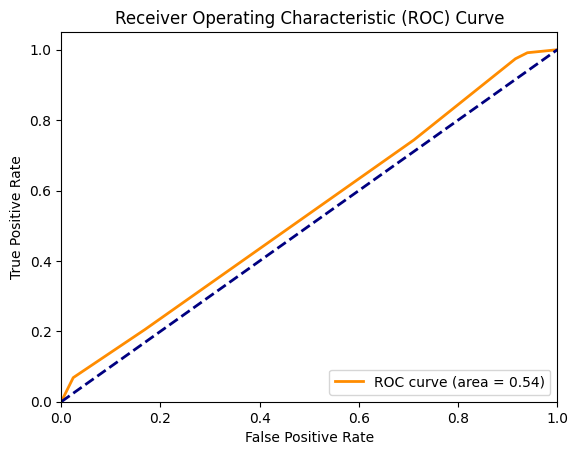

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Step 1: Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.round(predictions).astype(int).flatten() # Convert probabilities to binary labels

# Step 2: Generate the classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

# Step 3: Calculate sensitivity and specificity
conf_matrix = confusion_matrix(test_labels, predicted_labels)
tn, fp, fn, tp = conf_matrix.ravel()

sensitivity = tp / (tp + fn) # Sensitivity (also known as Recall or True Positive Rate)
specificity = tn / (tn + fp) # Specificity (also known as True Negative Rate)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

# Step 4: Plot ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# ResNet

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# Assuming you have installed TensorFlow 2.x and other necessary libraries

# Preprocess images for ResNet
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images = preprocess_input(train_images)
test_images = preprocess_input(test_images)

# Define ResNet50 model
input_shape = (224, 224, 3)
num_classes = 1  # Binary classification (real or fake)

# Load ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pretrained layers (optional)
for layer in resnet_model.layers:
    layer.trainable = False

# Add layers on top of ResNet50
inputs = Input(shape=input_shape)
resnet_output = resnet_model(inputs, training=False)
flatten = Flatten()(resnet_output)
dense = Dense(128, activation='relu')(flatten)
dropout = Dropout(0.5)(dense)
outputs = Dense(num_classes, activation='sigmoid')(dropout)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=16)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Optionally, save the model
model.save("resnet_deepfake_detector.h5")


94765736/94765736 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               12845184  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                            

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 1s 58ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.58      1.00      0.74       117

    accuracy                           0.58       200
   macro avg       0.29      0.50      0.37       200
weighted avg       0.34      0.58      0.43       200

Sensitivity: 1.0
Specificity: 0.0


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


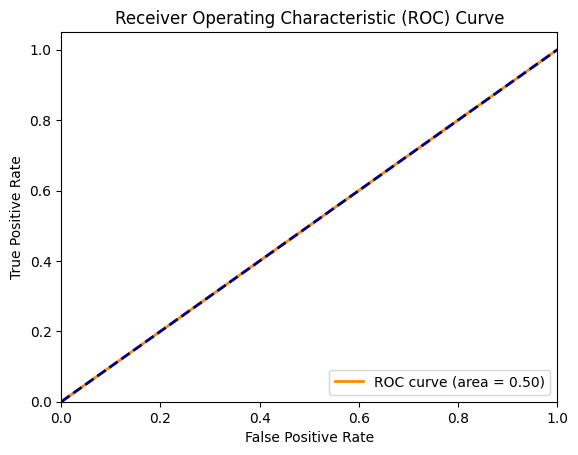

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Step 1: Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.round(predictions).astype(int).flatten() # Convert probabilities to binary labels

# Step 2: Generate the classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

# Step 3: Calculate sensitivity and specificity
conf_matrix = confusion_matrix(test_labels, predicted_labels)
tn, fp, fn, tp = conf_matrix.ravel()

sensitivity = tp / (tp + fn) # Sensitivity (also known as Recall or True Positive Rate)
specificity = tn / (tn + fp) # Specificity (also known as True Negative Rate)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

# Step 4: Plot ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Basic ensemble

In [13]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vit
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_efficientnet
from sklearn.metrics import accuracy_score

# Load the pre-trained models
resnet_model = load_model("resnet_deepfake_detector.h5")
vit_model = load_model("vit_deepfake_detector.h5")
efficientnet_model = load_model("efficientnetb7_deepfake_detector.h5")

# Preprocess images for each model type
def preprocess_images(images):
    images_resnet = preprocess_input(images)
    images_vit = preprocess_vit(images)
    images_efficientnet = preprocess_efficientnet(images)
    return images_resnet, images_vit, images_efficientnet

# Preprocess test images
test_images_resnet, test_images_vit, test_images_efficientnet = preprocess_images(test_images)

# Get predictions from each model
resnet_preds = resnet_model.predict(test_images_resnet)
vit_preds = vit_model.predict(test_images_vit)
efficientnet_preds = efficientnet_model.predict(test_images_efficientnet)

# Combine predictions (stacking)
stacked_preds = np.hstack((resnet_preds, vit_preds, efficientnet_preds))

# Meta-model for stacking
from sklearn.linear_model import LogisticRegression

meta_model = LogisticRegression()
meta_model.fit(stacked_preds, test_labels)

# Predict with the meta-model
stacked_test_preds = meta_model.predict(stacked_preds)

# Calculate accuracy
ensemble_accuracy = accuracy_score(test_labels, stacked_test_preds)
print(f"Ensemble model accuracy: {ensemble_accuracy}")


7/7 [==============================] - 7s 195ms/step
Ensemble model accuracy: 0.585


In [6]:
!pip install vit_keras

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.6 MB/s eta 0:00:00


In [8]:
!pip install tensorflow_addons

# Replicate research paper

In [14]:
pip install tensorflow vit-keras albumentations mtcnn


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Concatenate
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import EfficientNetB7
from vit_keras import vit
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import tensorflow as tf

def resize_images(images, size=(384, 384)):
    resized_images = np.array([tf.image.resize(image, size).numpy() for image in images])
    return resized_images

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

train_images = resize_images(train_images)
test_images = resize_images(test_images)

# Define the EfficientNet-B7 model
efficientnet_b7 = EfficientNetB7(include_top=False, input_shape=(384, 384, 3), weights='imagenet')
efficientnet_b7.trainable = False  # Freeze the EfficientNet-B7 layers

# Define the Vision Transformer model
vit_model = vit.vit_l32(
    image_size=384,
    activation='sigmoid',
    pretrained=True,
    include_top=False,
    pretrained_top=False
)

# Combine both models
input_shape = (384, 384, 3)
inputs = Input(shape=input_shape)
eff_output = efficientnet_b7(inputs)
vit_output = vit_model(inputs)

# Concatenate the outputs of EfficientNet-B7 and ViT
flatten_eff = Flatten()(eff_output)
flatten_vit = Flatten()(vit_output)
combined_output = Concatenate()([flatten_eff, flatten_vit])

# Add a fully connected layer
dense = Dense(128, activation='relu')(combined_output)
dropout = Dropout(0.5)(dense)
outputs = Dense(1, activation='sigmoid')(dropout)

model = Model(inputs=inputs, outputs=outputs)

optimizer = SGD(lr=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(train_images, train_labels, epochs=40, batch_size=12, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

model.save("combined_deepfake_detector.h5")

test_preds = model.predict(test_images)
test_preds = (test_preds > 0.5).astype(int)
f1 = f1_score(test_labels, test_preds)
print(f"F1 score: {f1}")


1226658854/1226658854 [==============================] - 6s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 384, 384, 3)]        0         []                            
                                                                                                  
 efficientnetb7 (Functional  (None, 12, 12, 2560)         6409768   ['input_8[0][0]']             
 )                                                        7                                       
                                                                                                  
 vit-l32 (Functional)        (None, 1024)                 3056076   ['input_8[0][0]']             
                                                          80                                      
                       

2024-06-21 02:24:58.827756: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/efficientnetb7/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


54/54 [==============================] - 169s 1s/step - loss: 9.4943 - accuracy: 0.5547 - val_loss: 0.6916 - val_accuracy: 0.5500
Epoch 2/40
54/54 [==============================] - 55s 1s/step - loss: 0.7140 - accuracy: 0.5562 - val_loss: 0.6905 - val_accuracy: 0.5500
Epoch 3/40
54/54 [==============================] - 55s 1s/step - loss: 0.7255 - accuracy: 0.5625 - val_loss: 0.6897 - val_accuracy: 0.5500
Epoch 4/40
54/54 [==============================] - 55s 1s/step - loss: 0.6885 - accuracy: 0.5609 - val_loss: 0.6892 - val_accuracy: 0.5500
Epoch 5/40
54/54 [==============================] - 55s 1s/step - loss: 0.6871 - accuracy: 0.5656 - val_loss: 0.6888 - val_accuracy: 0.5500
Epoch 6/40
54/54 [==============================] - 55s 1s/step - loss: 0.6873 - accuracy: 0.5609 - val_loss: 0.6885 - val_accuracy: 0.5500
Epoch 7/40
54/54 [==============================] - 55s 1s/step - loss: 0.6869 - accuracy: 0.5609 - val_loss: 0.6884 - val_accuracy: 0.5500
Epoch 8/40
54/54 [============

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 20s 1s/step
F1 score: 0.7381703470031545


7/7 [==============================] - 7s 1s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.58      1.00      0.74       117

    accuracy                           0.58       200
   macro avg       0.29      0.50      0.37       200
weighted avg       0.34      0.58      0.43       200

Sensitivity: 1.0
Specificity: 0.0


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


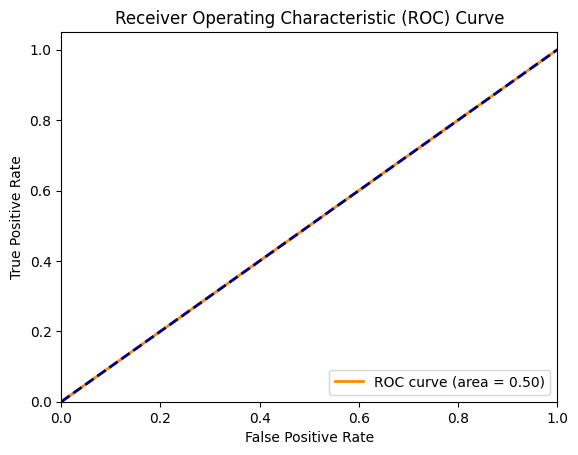

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Step 1: Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.round(predictions).astype(int).flatten() # Convert probabilities to binary labels

# Step 2: Generate the classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

# Step 3: Calculate sensitivity and specificity
conf_matrix = confusion_matrix(test_labels, predicted_labels)
tn, fp, fn, tp = conf_matrix.ravel()

sensitivity = tp / (tp + fn) # Sensitivity (also known as Recall or True Positive Rate)
specificity = tn / (tn + fp) # Specificity (also known as True Negative Rate)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

# Step 4: Plot ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
